In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import matplotlib

class Perceptron(object):
    
    def __init__(self, eta=0.01, n_iter=10, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state) # 책의 예제와 똑같게 하기 위한 시드값
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1]) # 처음 Weight를 초기화하기 위해서 정규분포로 난수를 생성해서 Weight에 넣어줌
        
        self.errors_ = []
        
        for _ in range(self.n_iter): # n_iter만큼 Epoch 돌림
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi # 각 Weight 값을 한번에 초기화
                self.w_[0] += update # bias값도 업데이트 해줌
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)
     
     ## np.where(조건문, x, y) / 조건문이 True면 x선택, False면 y선택
     
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) # phi(X)를 구하는 X와 Weight의 내적

    

In [3]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
df.tail() # 붓꽃 데이터셋 불러와서 끝에 5개만 출력

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


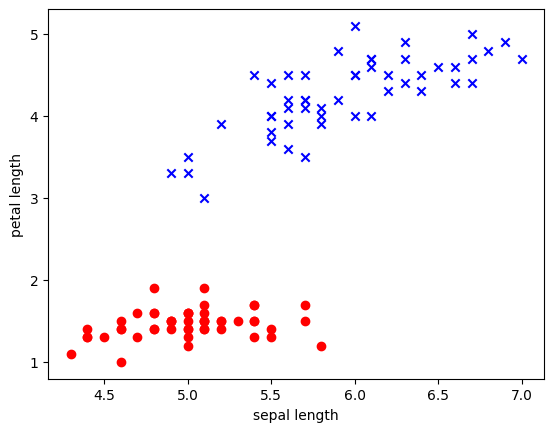

In [4]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values

plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.show()
# 데이터를 받아와서 산점도를 그림


C:\Users\조승현\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\조승현\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54253 (\N{HANGUL SYLLABLE POG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\조승현\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50724 (\N{HANGUL SYLLABLE O}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\조승현\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


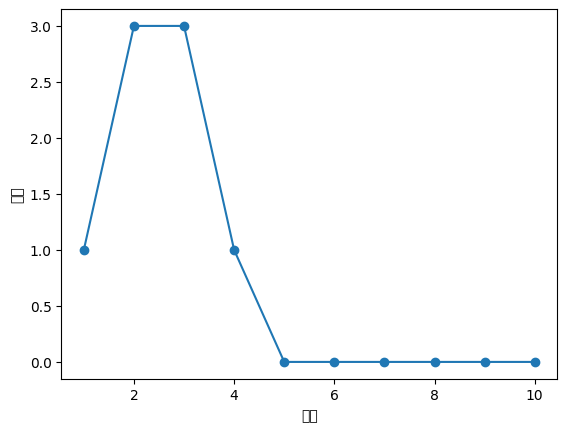

In [5]:
ppn = Perceptron(eta=0.1, n_iter=10) # learning rate = 0.1 / epoch = 10
ppn.fit(X,y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')

plt.xlabel("에폭")
plt.ylabel("오차")
plt.show() # 그래프를 보면 epoch 5부터 수렴하는걸 볼 수 있음.

C:\Users\조승현\AppData\Local\Temp\ipykernel_37828\3741913536.py:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


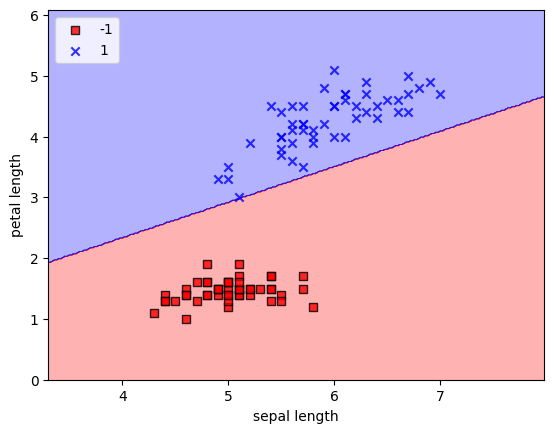

In [ ]:
from matplotlib.colors import ListedColormap


### Decision boundary를 그려주는 함수

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # 마커와 컬러맵을 설정합니다
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), # np.arange(X) 0부터 x까지 1차원 배열로 만들어주는 함수
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) # np.ravel() n차원의 이상의 함수를 1차원으로 flatten 해주는 함수
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 샘플의 산점도를 그립니다
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    
### Decision boundary 출력
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.show()

C:\Users\조승현\AppData\Local\Temp\ipykernel_37828\3741913536.py:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


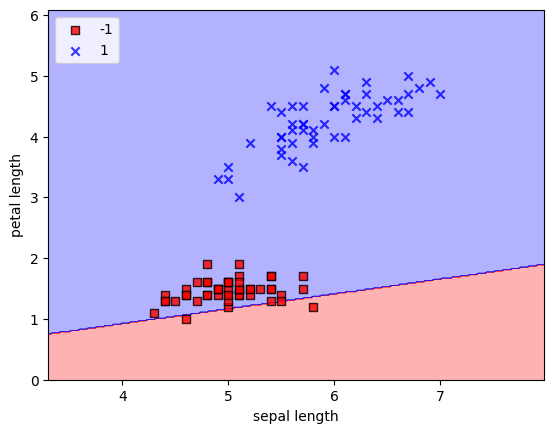

In [ ]:
### Adaline GD 구현

# 퍼셉트론 규칙은 입력값만을 가지고, loss function없이 가중치를 업데이트 하며 학습하지만,
# Adaline은 제곱 오차 loss function을 가지고 미분을 통해 weight를 업데이트한다.

class AdalineGD(object):
    # 생성자
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    # 학습 함수
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors ** 2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) > 0.0, 1, -1)

    def activation(self, X):
        return X


### 구현이 제대로 됐나 확인
'''    
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')


ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.show()

# 왼쪽은 eta가 너무커서 오차가 발산해버린다.
# 오른쪽은 eta가 너무 작아서 수렴하는데 너무너무 오래걸린다.
'''

### Decision boundary 출력
#ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
plot_decision_regions(X, y, classifier=ada2)
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.show()

# 결과를 보면 ada1은 아에 데이터를 구분 못하고
# ada2는 구분을 하긴 하지만 제대로 학습하지 못해서 Decision boundary가 다른곳에 가있음을 알 수 있음.

C:\Users\조승현\AppData\Local\Temp\ipykernel_37828\3741913536.py:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


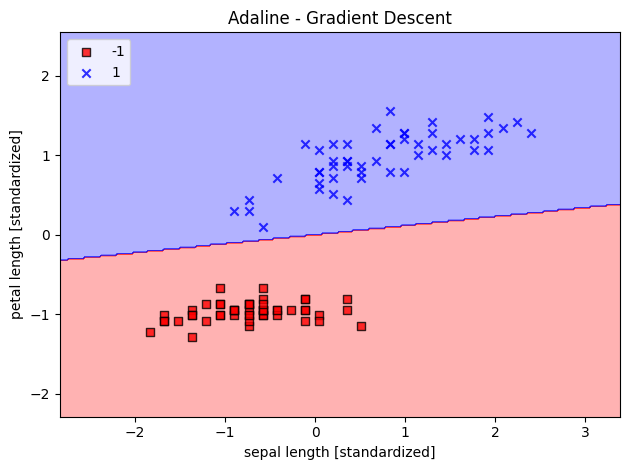

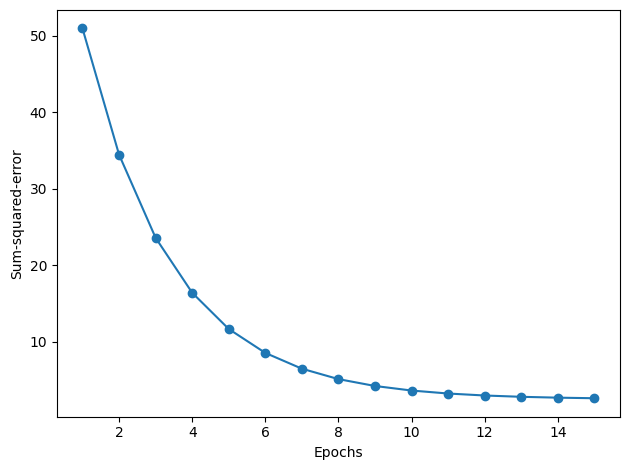

In [ ]:
### 데이터 스케일 조정(표준화, 전처리)

X_std = np.copy(X) 
# 식을 그대로 가져다 적으면 됨.
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()


# 표준화된 데이터로 다시 한번 학습 시켜보고 결과 보기
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
plt.show()

### 정상적으로 나옴을 볼 수 있음.

C:\Users\조승현\AppData\Local\Temp\ipykernel_37828\3741913536.py:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


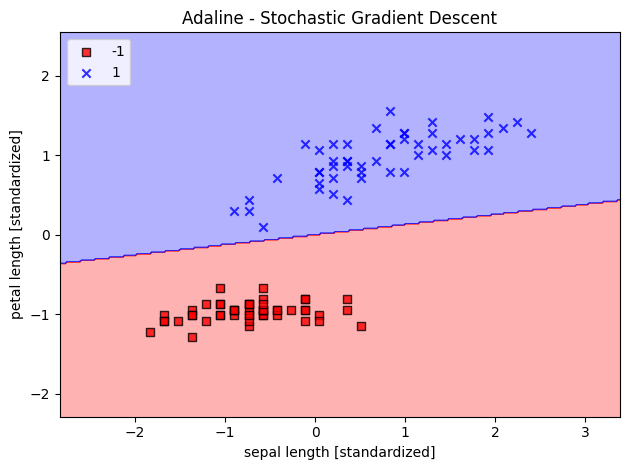

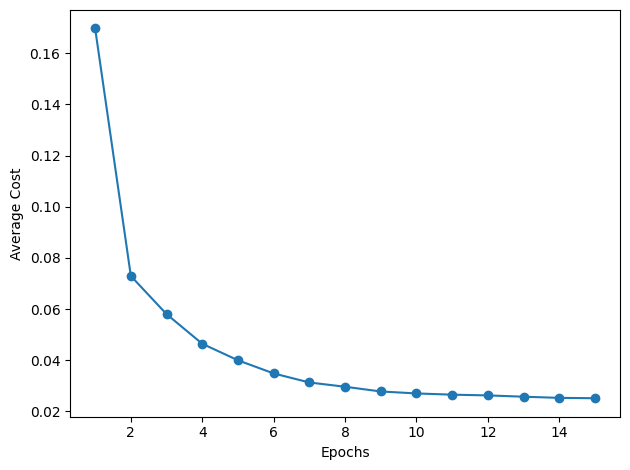

In [ ]:
class AdalineSGD(object):
    def __init__(self, eta=0.01, n_iter=10, shuffle='True', random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
    
    # 훈련시키는 메서드  
    def fit(self, X, y):
        self._initialize_weights(X.shape[1]) # 0이 아닌 아주 랜덤한 아주 작은값으로 초기화
        self.cost_ = [] # epoch마다 avg_cost를 저장할 리스트
        
        for i in range(self.n_iter):
            if self.shuffle: # Stochastic Gradient Descent는 매 에폭마다 데이터셋을 한번 섞어서 데이터를 뽑음
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        
        return self
    
    def partial_fit(self, X, y):
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self
    
    def _shuffle(self, X, y):
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    # 정규 분포 내에서 난수를 생성해서 weight를 초기화 시켜주는 함수
    def _initialize_weights(self, m):
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size = 1 + m)
        self.w_initialized = True
    
    def _update_weights(self, xi, target):
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:] + self.w_[0])
    
    def activation(self, X):
        return X
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)


ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()
plt.show()

# 완벽하게 분류 완료!  

### 헷갈리는 개념중 하나가 에폭마다 딱 1개만 뽑아서 업데이트 하는게 아니라
### 에폭당 1개를 보고 업데이트를 n번 반복해서 결국 업데이트 수는 GD와 같음
### 그러면 굳이 왜쓰냐? 에폭의 수가 달라지기 때문.
### 업뎃 횟수는 에폭이 같으면 같지만, GD는 수렴이 훨씬 느려서 SGD로는 10에폭으로 수렴할거 몇천, 몇만 에폭이 필요하다.
### 그래서 절대적인 에폭을 줄일수 있기 때문에 SGD를 사용한다.

   

In [ ]:
### 알아두면 좋은 np 메서드들

# 1. np.ravel() 다차원의 np 배열을 1차원으로 flatten 해주는 함수(원본)
# 2. np.flatten() 1번과 역할을 같지만, 항상 복사본을 반환함
# 3. np.arange(int) 0부터 int값 까지의 1차원 배열을 생성해줌.
# 4. np.squeeze() 차원이 1인 axis를 제거해줌. (예: (1, 100, 1) → (100,))
# 5. np.expand_dims() 차원을 하나 추가해주는 메서드
# 6. np.random.RandomState.normal(loc, scale, size)
# >>> 정규분포 내에서 난수를 생성해주는 메서드 (np 배열을 반환)
# 7. np.random() 0~1 사이의 랜덤한 값을 반환해줌 (스칼라)
# 8. np.argmin, np.argmax() min과 max의 "인덱스"를 반환 (arg 붙었으면 인덱스를 반환해준다고 보면됨)
# 9. np.linspace(start, stop, num) start ~ stop까지를 num개로 나눠서 균등하게 분할한 수를 생성해줌